
# Exploratory Analysis & Summary Statistics
### 1. Marketing Metrics

In [39]:
# Import pandas into the environment
import pandas as pd

# Import marketing.csv with date columns
marketing = pd.read_csv('../data/marketing2.csv', 
                        parse_dates = ['date_served', 'date_subscribed', 'date_canceled'])

# Add a DoW column
marketing.head()
marketing = marketing.dropna(subset=['converted'])


### 1.1. Calculating conversion rate using pandas
To calculate the total number of people who converted, we slice the DataFrame to include only the rows where "converted" equals True and then count the unique user_ids using ```nunique()```. Next, we calculate the total number of people we marketed to. We can do this by counting all the unique user IDs in our dataset. Now that we have the total number of users and users who subscribed, we can calculate conversion rate by dividing subscribers by total.


In [40]:
# Calculate the number of people we marketed to
total = marketing['user_id'].nunique()

# Calculate the number of people who subscribed
subscribers = marketing[(marketing['converted']) & (~marketing['converted'].isna())]['user_id'].nunique()

# Calculate the conversion rate
conversion_rate = subscribers / total
print(round(conversion_rate*100, 2), "%")

14.09 %



### 1.2. Calculating retention rate
To determine retention rate, we first calculate the total number of users who remain subscribers after one month. This information is available in the column "is_retained". We now slice the DataFrame to include only rows where the user was retained, that is, where is_retained equals True and count the unique user_ids. We can reuse our "subscribers" calculation from the conversion rate calculation, as the number of total users who originally subscribed remains the same. Finally, we divide the number of users who were retained by the number of users who subscribed to calculate the retention rate.

In [41]:
# Calculate the number of subscribers
total_subscribers = marketing[(marketing['converted']) & (~marketing['converted'].isna())]['user_id'].nunique()

# Calculate the number of people who remained subscribed
retained = marketing[(marketing['is_retained']) & (~marketing['is_retained'].isna())]['user_id'].nunique()

# Calculate the retention rate
retention_rate = retained / total_subscribers
print(round(retention_rate*100, 2), "%")

676.41 %


# 2. Customer Segmentation
One way to segment is by subscribing channel. Let's check the retention rate for users who converted by clicking on a House Ad. To do this, we first subset the DataFrame to include data only for House Ads, that is, where subscribing_channel equals House Ads. Using the house_ads DataFrame, you can calculate retention rate like before, dividing the total number of users retained by the number of subscribers who originally subscribed through a House Ad. That's great! But how do you know if this retention rate is good or bad? Ideally, you will compare retention rates across all channels to determine whether some channels perform better than others.



**Segmenting using pandas - ```groupby()```**
This is when the flexibility of pandas comes in handy! You can use the ```groupby()``` method to analyze and calculate statistics for multiple sub-segments in your data. Here we first subset the data to include only the customers who were retained and then group by subscribing_channel. Then, we count the number of unique user ids to find the total number of retained customers per channel. Segmenting using pandas - ```groupby()``` Similarly, we subset the data to include the customers who subscribed, group by subscribing_channel and count the number of unique user ids to find the total number of subscribers for each channel.

In [42]:
marketing.marketing_channel.unique()

array(['House Ads', 'Push', 'Facebook', 'Instagram', 'Email', nan],
      dtype=object)

In [43]:
# Isolate english speakers
english_speakers = marketing[marketing['language_displayed'] == 'English']

# Calculate the total number of English speaking users
total = english_speakers['user_id'].nunique()

# Calculate the number of English speakers who converted
subscribers = english_speakers[english_speakers['converted']]['user_id'].nunique()

# Calculate conversion rate
conversion_rate = subscribers/total
print('English speaker conversion rate:', round(conversion_rate*100,2), '%')

English speaker conversion rate: 13.13 %


**Comparing language conversion rate**

Next, you want to look at the conversion rate by the language that the marketing asset was shown in. While many of your users speak English, some prefer another language. Let's check to make sure marketing material translated well across languages.

You can analyze metrics by specific demographics using .groupby(). Rather than looking at the overall conversion rate in the dataset, you instead group by language preference, which allows you to determine whether the marketing campaign was more effective in certain languages.

In [44]:
# Group by language_displayed and count unique users
total = marketing.groupby('language_displayed')['user_id'].nunique()

# Group by language_displayed and count unique conversions
subscribers = marketing[marketing['converted']].groupby('language_displayed')['user_id'].nunique()

# Calculate the conversion rate for all languages
language_conversion_rate = subscribers / total
print(language_conversion_rate)

language_displayed
Arabic     0.500000
English    0.131260
German     0.716216
Spanish    0.200000
Name: user_id, dtype: float64


**Aggregating by date**

The marketing team wants to know whether there is any difference in the conversion rate based on when in the month, your users saw an ad. In this exercise, you will practice ```.groupby()``` again, this time looking at how metrics have evolved.

In [45]:
# Group by date_served and count unique users
total = marketing.groupby('date_served')['user_id'].nunique()

# Group by date_served and count unique converted users
subscribers = marketing[marketing['converted']].groupby('date_served')['user_id'].nunique()

# Calculate the conversion rate per day
daily_conversion_rate = subscribers/total
print(daily_conversion_rate.head())

date_served
2018-01-01    0.099448
2018-01-02    0.098930
2018-01-03    0.103448
2018-01-04    0.108359
2018-01-05    0.125392
Name: user_id, dtype: float64


# 3. Plotting campaign results
Now that you've practiced aggregating and segmenting the results, it's time to learn how best to visualize these results in order to increase ease of interpretability, especially for people on our team who might be less comfortable with data.

**Comparing language conversion rates**

Let's use the language_conversion_rate series you created in the previous lesson. First, we'll ```import matplotlib.pyplot as plt```. Next, we call the ```plot()``` method on language_conversion_rate and specify the kind argument as bar indicating that we want to create a bar chart. Bar charts enable us to visually compare the conversion rates. Next, we add a title and axis labels to this plot. Finally, we show the plot using ```plt.show()```.


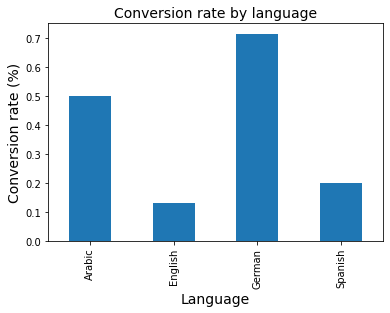

In [46]:
import matplotlib.pyplot as plt
# Create a bar chart using language_conversion_rate DataFrame
language_conversion_rate.plot(kind='bar')

# Add a title and x and y-axis labels
plt.title('Conversion rate by language', size = 14)
plt.xlabel('Language', size = 14)
plt.ylabel('Conversion rate (%)', size = 14)

# Display the plot
plt.show()

**Creating daily conversion rate DataFrame**

To understand trends over time, you will create a new DataFrame that includes the conversion rate each day. You will follow essentially the same steps as before when you calculated the overall conversion rate, this time also grouping by the date a user subscribed.

Looking at the daily conversion rate is crucial to contextualize whether the conversion rate on a particular day was good or bad. Additionally, looking at conversion rate over time can help to surface trends such as a conversion rate that appears to be going down over time. These kinds of trends are crucial to identify for your marketing stakeholders as early as possible.

In [50]:
# Group by date_served and count unique users
total = marketing.groupby(['date_served'])['user_id'].nunique()

# Group by date_served and calculate subscribers
subscribers = marketing[marketing['converted']].groupby(['date_served'])['user_id'].nunique()

# Calculate the conversion rate for all languages
daily_conversion_rates = subscribers/total
daily_conversion_rates.head()

date_served
2018-01-01    0.099448
2018-01-02    0.098930
2018-01-03    0.103448
2018-01-04    0.108359
2018-01-05    0.125392
Name: user_id, dtype: float64

**Setting up our data to visualize daily conversion**

When you want to understand how your campaign performed, it is essential to look at how key metrics changed throughout the campaign. Your key metrics can help you catch problems that may have happened during the campaign, such as a bug in the checkout system that led to a dip in conversion toward the end of your campaign. Metrics over time can also surface trends like gaining more subscribers over the weekends or on specific holidays.

In this exercise, you will build upon the daily conversion rate Series ```daily_conversion_rates``` you built in a previous exercise. Before you can begin visualizing, you need to transform your data into an easier format to use with ```pandas``` and ```matplotlib```.

In [51]:
# Reset index to turn the results into a DataFrame
daily_conversion_rate = daily_conversion_rates.reset_index()

# Rename columns
daily_conversion_rate.columns = ['date_subscribed', 
                              'conversion_rate']

daily_conversion_rate.head()

,date_subscribed,conversion_rate
0,2018-01-01,0.099448
1,2018-01-02,0.098930
2,2018-01-03,0.103448
3,2018-01-04,0.108359
4,2018-01-05,0.125392


**Visualize daily conversion rate**

Now that your formatted the data into a more manageable format for visualization, you will proceed to create a line chart. Strong visualization skills are crucial for a data scientist because it will allow you and your marketing stakeholders to derive deeper insights from the data. In this case, creating a line plot will make it much easier to notice peaks and valleys in our conversion rate over time as well as any overall trends.

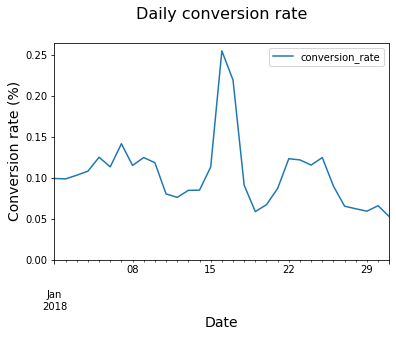

In [52]:
# Create a line chart using daily_conversion_rate DataFrame
daily_conversion_rate.plot('date_subscribed', 
                           'conversion_rate')

plt.title('Daily conversion rate\n', size = 16)
plt.ylabel('Conversion rate (%)', size = 14)
plt.xlabel('Date', size = 14)

# Set the y-axis to begin at 0
plt.ylim(0)

# Display the plot
plt.show()